<a href="https://colab.research.google.com/github/ryu-i-engineer/ImageAnnotationChallenge/blob/main/notebooks/ImageAnnotationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ImageAnnotationChallenge

## Overview : 概要

### Project target : プロジェクト目標

- 普通のECサイトにおける検索機能について､改善方法を検討する
- 画像認識によるタグ付けの開発を優先する
- メンバーも実際のプロジェクト経験をもらいつつ､デモプロジェクトの開発と記事を作成できるまで頑張る

In English:
- Consider the ways how to improve search function on e-commerce site.
- Prioritize the development of tagging by image recognition.
- The members will do our best until creating an article and developing demo project, gaining project experience.


### Study scope : 学習範囲

* Note記事を書く
* 画像認識によるタグ付けを優先して開発する
* 日本語･英語両方タグ付けできるようにする

In English:

* Write a note article
* Develop tagging system by image recognition in priority
* The system becomes able to tag  in Japanese and English


### Repository

* [TOP](https://github.com/ryu-i-engineer/ImageAnnotationChallenge)
* [Projects](https://github.com/ryu-i-engineer/ImageAnnotationChallenge/projects/2)

## Reference

- https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
- https://www.tensorflow.org/tutorials/images/segmentation

### About Transfer learning

#### Domain problem

- [転移学習：機械学習の次のフロンティアへの招待](https://qiita.com/icoxfog417/items/48cbf087dd22f1f8c6f4#%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%AE%E5%8F%96%E3%82%8A%E7%B5%84%E3%82%80%E5%95%8F%E9%A1%8C)

## Dataset

### Using web scraping

From here.
- https://jp.misumi-ec.com/vona2/mech_screw/M3303000000/?rid=c21_top_4_M3303000000

In [ ]:
import os
import seaborn as sns
import pandas as pd

misumi_dataset_path = "./inputs/misumi_dataset_cleansing"

label_names = []
label_file_counts = []

for dir_name in os.listdir(misumi_dataset_path):
    label_names.append(dir_name)
    label_file_counts.append(len([filename for filename in os.listdir(os.path.join(misumi_dataset_path, dir_name)) if os.path.isfile(os.path.join(misumi_dataset_path, dir_name, filename))]))
    

In [ ]:
d = {'Labels' : label_names, 'File counts': label_file_counts}
misumi_df = pd.DataFrame(d)
misumi_df.describe()

,File counts
count,134.000000
mean,87.089552
std,170.999559
min,2.000000
25%,17.000000
50%,40.000000
75%,86.750000
max,1491.000000


### Dummy data

- 3D
- CAD
- Items should not be there.
- Utilities something like "Accessories" and "Components"

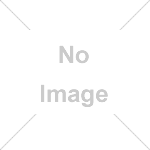
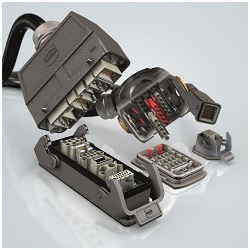
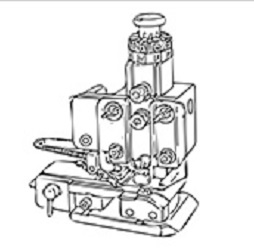
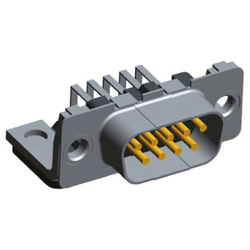

### Define lables and binarize

#### CSV format

```csv
"directory","filename","tag1","tag2","tag3","tag4","tag5","tag6","tag7","tag8","tag9","tag10"
"nuts","test.jpg","nuts","metal","hex",
"bolts","test2.jpg","nuts","non-metal","screws","flat"
```

#### Code

In [ ]:
import pandas as pd
df = pd.read_csv("./inputs/fasteners/fasteners_label.csv")
df.dropna(axis=1, how="all")

,directory,filename,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8
0,screw,000000.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
1,screw,000001.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
2,screw,000002.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
3,screw,000003.jpg,Blue,Phillips,Flat,Carbon Steel,Masonry Anchor,NaN,NaN,NaN
4,screw,000004.jpg,Blue,Phillips,Flat,Carbon Steel,Masonry Anchor,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3793,screw,003987.jpg,Burgundy,External Hex,Hex Washer Head,Steel,Roofing Screw,Hi-Lo,NaN,NaN
3794,screw,003988.jpg,Burgundy,External Hex,Hex Washer Head,Steel,Roofing Screw,Hi-Lo,NaN,NaN
3795,screw,003989.jpg,Bronze,External Hex,Hex Washer Head,Steel,Roofing Screw,Hi-Lo,NaN,NaN
3796,screw,003990.jpg,Bronze,External Hex,Hex Washer Head,Steel,Roofing Screw,Hi-Lo,NaN,NaN


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df = df.dropna(axis=1, how='all') # save memory and process usage
df = df.fillna('None') # to avoid error

result = mlb.fit_transform( df.drop(columns=['directory', 'filename']).values) # drop not tagging cols

bin_df = pd.DataFrame(result, columns=mlb.classes_).drop('None', axis=1) # drop non-useless col.
bin_df = df.join(bin_df).drop(["tag1", "tag2", "tag3", "tag4", "tag5", "tag6", "tag7", "tag8"], axis=1)
bin_df.head()

,directory,filename,1022 Carbon Steel,18-8 Stainless Steel,Aluminum,Binding,Black,Blue,Brass,Bronze,...,Timber Bolts,Torx 6 Lobe Flat Head Machine Screw,Torx 6 Lobe Pan Head Self Drilling Screw,Torx 6 Lobe Truss Head Machine Screw,Trim,Truss,White,Wood Screw,Yellow,Zinc Plated Steel
0,screw,000000.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,screw,000001.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,screw,000002.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,screw,000003.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,screw,000004.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Tag list

See also,
- [Fasterner(wiki)](https://en.wikipedia.org/wiki/Fastener)
- [Nuts(wiki)](https://en.wikipedia.org/wiki/Nut_(hardware))
- [Wahser(wiki)](https://en.wikipedia.org/wiki/Washer_(hardware))
- [Electrical cable(wiki)](https://en.wikipedia.org/wiki/Electrical_cable)

##### Components


- accessories
- caps
- cables
- connector
- conduits
- bolts
- ducts
- fully-threaded
- image_seonsor
- io_board
- mount
- nuts
- pins
- rings
- screws
- tape
- tie
- tools
- washer
- wire

##### Materials


- metal
- nylon
- plastic
- celamic

##### Shapes

- ac_servo
- av_antenna
- audio_video
- branching
- clinching
- clip
- crimp
- cylindrical
- display
- domed
- eye_screws
- fiber_optic
- flanged
- flat
- gauge
- hex
- high
- inserts
- knurled
- lan
- lock
- machine_keys
- micro
- precise
- printer
- ps2
- rectangular
- rivet
- rc232
- scsi
- slot
- spacer
- thumb_ornamental
- usb
- wing
- weld

## Codes

### Using TF Hub for Transfer learning

#### Prepare

In [ ]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17357529342419956014
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4853137408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15312608141547125607
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [ ]:
# Download classification
# classifier_url = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5" # ResNet-152
# classifier_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2" # EfficientNet V2

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

# classifier_model = mobilenet_v2

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(mobilenet_v2, input_shape=IMAGE_SHAPE+(3,))
])

#### Execute one image file

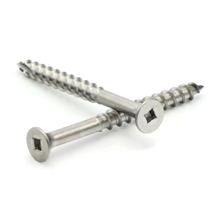

In [ ]:
import numpy as np
import PIL.Image as Image

# grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
# grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
# grace_hopper = Image.open("./inputs/misumi_dataset/ac_servo_motor_cables/000001.jpg").resize(IMAGE_SHAPE)
grace_hopper = Image.open("./inputs/fasteners/screw/000001.jpg").resize(IMAGE_SHAPE)
grace_hopper

In [ ]:
# Get batch dimension and input image to model.
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [ ]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=513>

#### Decode the predict result

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

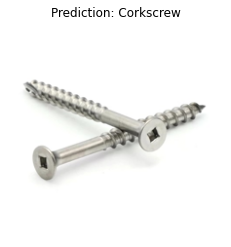

In [ ]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [ ]:
# data_root = tf.keras.utils.get_file(
#   'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#    untar=True)

data_root = "./inputs/fasteners"

In [ ]:
import pandas as pd
pd.read_csv('./inputs/fasteners/fasteners_label.csv').dropna(axis=1, how='all')

,directory,filename,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8
0,screw,000000.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
1,screw,000001.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
2,screw,000002.jpg,Silver,Internal Square,Bugle,Stainless Steel,Deck Screw,Coarse,NaN,NaN
3,screw,000003.jpg,Blue,Phillips,Flat,Carbon Steel,Masonry Anchor,NaN,NaN,NaN
4,screw,000004.jpg,Blue,Phillips,Flat,Carbon Steel,Masonry Anchor,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4620,nut,000396.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4621,nut,000397.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4622,nut,000398.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4623,nut,000399.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df = pd.read_csv('./inputs/fasteners/fasteners_label.csv')
df = df.dropna(axis=1, how='all') # save memory and process usage

result = mlb.fit_transform(df.fillna('None').drop(columns=['directory', 'filename']).values) # drop not tagging cols

bin_df = pd.DataFrame(result, columns=mlb.classes_) # drop non-useless col.

In [ ]:
labels = bin_df.columns
labels

Index([' 1022 Carbon Steel', ' 18-8 Stainless Steel', ' Acorn', ' Acorn Nut',
       ' Aluminum', ' Beveled Square Washer', ' Binding', ' Black', ' Blue',
       ' Brass',
       ...
       ' Well Nut', ' White', ' Wing Nut', ' Wood Screw', ' Yellow', ' Zinc',
       ' Zinc Plated Steel', 'Hex', 'Internal Square', 'None'],
      dtype='object', length=224)

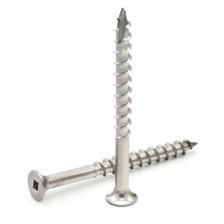

In [ ]:
import os
Image.open(os.path.join(data_root, df['directory'][0], df.filename[0])).resize(IMAGE_SHAPE)

In [ ]:
image_list = [os.path.join(data_root, row.directory, row.filename) for row in df.loc[:, 'directory':'filename'].itertuples()]

In [ ]:
data = []
for image_path in image_list:
    img = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    data.append(tf.image.resize(img, IMAGE_SHAPE))

In [ ]:
data = np.array(data, dtype="float")/255

In [ ]:
from sklearn.model_selection import train_test_split
trainX, valX, trainY, valY = train_test_split(data, bin_df.to_numpy(), test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_root),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  str(data_root),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 4625 files belonging to 3 classes.
Using 3700 files for training.
Found 4625 files belonging to 3 classes.
Using 925 files for validation.


In [ ]:
class_names = np.array(train_ds.class_names)
print(f"This datasets has {len(class_names)} classes.")

This datasets has 3 classes.


In [ ]:
# add normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [ ]:
# avoid I/O blocking issues
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

NameError: ignored

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


#### Download headless model

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
effienct_v2 = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2"

feature_extractor_model = mobilenet_v2

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False
)

In [ ]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

#### Attach a classification head

In [ ]:
len(bin_df.to_numpy())

4625

In [ ]:
num_classes = bin_df.to_numpy().shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SHAPE+(3,)),
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])
model.build((None,)+IMAGE_SHAPE+(3,))

In [ ]:
predictions = model(image_batch)
predictions.shape

TensorShape([32, 3])

#### Train model

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0005),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 224)               286944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 224)               50400     
Total params: 2,595,328
Trainable params: 337,344
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print(trainX.shape)
print(trainY.shape)

(3700, 224, 224, 3)
(3700, 224)


In [ ]:
NUM_EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=3
)

history = model.fit(x=aug.flow(trainX, trainY, batch_size=32),
                    validation_data=(valX, valY),
                    epochs=NUM_EPOCHS,
                    steps_per_epoch=len(trainX) // 32,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/50
115/115 [==============================] - 39s 293ms/step - loss: 0.1482 - binary_accuracy: 0.9434 - val_loss: 0.0666 - val_binary_accuracy: 0.9803
Epoch 2/50
115/115 [==============================] - 32s 279ms/step - loss: 0.0748 - binary_accuracy: 0.9781 - val_loss: 0.0664 - val_binary_accuracy: 0.9803
Epoch 3/50
115/115 [==============================] - 33s 290ms/step - loss: 0.0720 - binary_accuracy: 0.9788 - val_loss: 0.0659 - val_binary_accuracy: 0.9803
Epoch 4/50
115/115 [==============================] - 32s 279ms/step - loss: 0.0703 - binary_accuracy: 0.9791 - val_loss: 0.0658 - val_binary_accuracy: 0.9803


In [ ]:
predictions = model.predict(valX)

In [ ]:
predictions

array([[0.01332385, 0.00255993, 0.00129701, ..., 0.00892475, 0.00191397,
        0.99349   ],
       [0.01241026, 0.00241935, 0.00121596, ..., 0.00835022, 0.0017495 ,
        0.99354035],
       [0.01326259, 0.00249893, 0.00127752, ..., 0.00889198, 0.0019081 ,
        0.9935516 ],
       ...,
       [0.01234489, 0.00243045, 0.00123722, ..., 0.00834327, 0.0018868 ,
        0.9935883 ],
       [0.01370726, 0.00253728, 0.00128783, ..., 0.0088795 , 0.00195426,
        0.9935103 ],
       [0.01072003, 0.00218673, 0.00107944, ..., 0.00779717, 0.0016361 ,
        0.994101  ]], dtype=float32)

In [ ]:
trainY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1])

In [ ]:
ttt = predictions
ttt[ttt>0.5]=1
ttt[ttt<0.5]=0

In [ ]:
ttt == trainY[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
mlb.inverse_transform(ttt)

[(' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Coarse', ' Silver', ' Stainless Steel', 'None'),
 (' Silver', 'None'),
 (' Coarse', ' Silver', 

In [ ]:
count = 0
for i in trainY:
    predictions[0][predictions > 0.5] = 1
    predictions[0][predictions <= 0.5] = 0

IndexError: ignored

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

#### Visualization of model training history

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

KeyError: ignored

#### Result

In [ ]:
print(predicted_id)
print(labels_batch)

NameError: ignored

In [ ]:
class_names[33]

In [ ]:
from textwrap import wrap
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n].numpy() == labels_batch[n].numpy() else "red"
  plt.title('\n'.join(wrap(predicted_label_batch[n].title(), 15)), color=color, fontsize=10)
  plt.axis('off')
_ = plt.suptitle("Model predictions")

#### Export model

In [ ]:
from datetime import date

export_path = f"./models/{date.today().isoformat()}_{str(int(time.time()))}"
model.save(export_path, save_format='tf')

export_path

INFO:tensorflow:Assets written to: ./models/2021-10-26_1635176309\assets


'./models/2021-10-26_1635176309'

In [ ]:
# import os
# # os.listdir("./models/")
# print(len(next(os.walk('./models/'))[1]))

2


In [ ]:
# reloaded = tf.keras.models.load_model(export_path)

NameError: ignored

In [ ]:
# result_batch = model.predict(image_batch)
# reloaded_result_batch = reloaded.predict(image_batch)

In [ ]:
# abs(reloaded_result_batch - result_batch).max()

# Multi Label

In [ ]:
LABELS = bin_df.columns[2:].to_list()
LABELS[:5]

['1022 Carbon Steel', '18-8 Stainless Steel', 'Aluminum', 'Binding', 'Black']

In [ ]:
import glob, os
data_dir = "./inputs/fasteners/screw"
filenames = glob.glob(os.path.join(data_dir, "*.jpg"))

In [ ]:
ds_size = len(filenames)
print("Number of images in folders: ", ds_size)

number_of_selected_samples = 3798
filelist_ds = tf.data.Dataset.from_tensor_slices(filenames[:number_of_selected_samples])

ds_size=filelist_ds.cardinality().numpy()
print("Number of selected samples for dataset: ", ds_size)

Number of images in folders:  3798
Number of selected samples for dataset:  3798


In [ ]:
filenames[:5]

['./inputs/fasteners/screw\\000000.jpg',
 './inputs/fasteners/screw\\000001.jpg',
 './inputs/fasteners/screw\\000002.jpg',
 './inputs/fasteners/screw\\000003.jpg',
 './inputs/fasteners/screw\\000004.jpg']

In [ ]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  file_name= parts[-1]
#   labels= bin_df[bin_df["filename"]==file_name][LABELS].to_numpy().squeeze()
  return tf.squeeze(bin_df[bin_df['filename']==file_name][LABELS])

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 64 , 64
def decode_img(img):
  #color images
  img = tf.image.decode_jpeg(img, channels=3) 
  #convert unit8 tensor to floats in the [0,1]range
  img = tf.image.convert_image_dtype(img, tf.float32) 
  #resize 
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [ ]:
def combine_images_labels(file_path: tf.Tensor):
  label = get_label(file_path)
  label = tf.cast(label, tf.int64)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
train_ratio = 0.80
ds_train=filelist_ds.take(ds_size*train_ratio)
ds_test=filelist_ds.skip(ds_size*train_ratio)

In [ ]:
BATCH_SIZE = 64

In [ ]:
ds_train=ds_train.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [ ]:
ds_test= ds_test.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [ ]:
def covert_onehot_string_labels(label_string,label_onehot):
  labels=[]
  for i, label in  enumerate(label_string):
     if label_onehot[i]:
       labels.append(label)
  if len(labels)==0:
    labels.append("NONE")
  return labels

9 samples from the dataset


<Figure size 432x288 with 0 Axes>

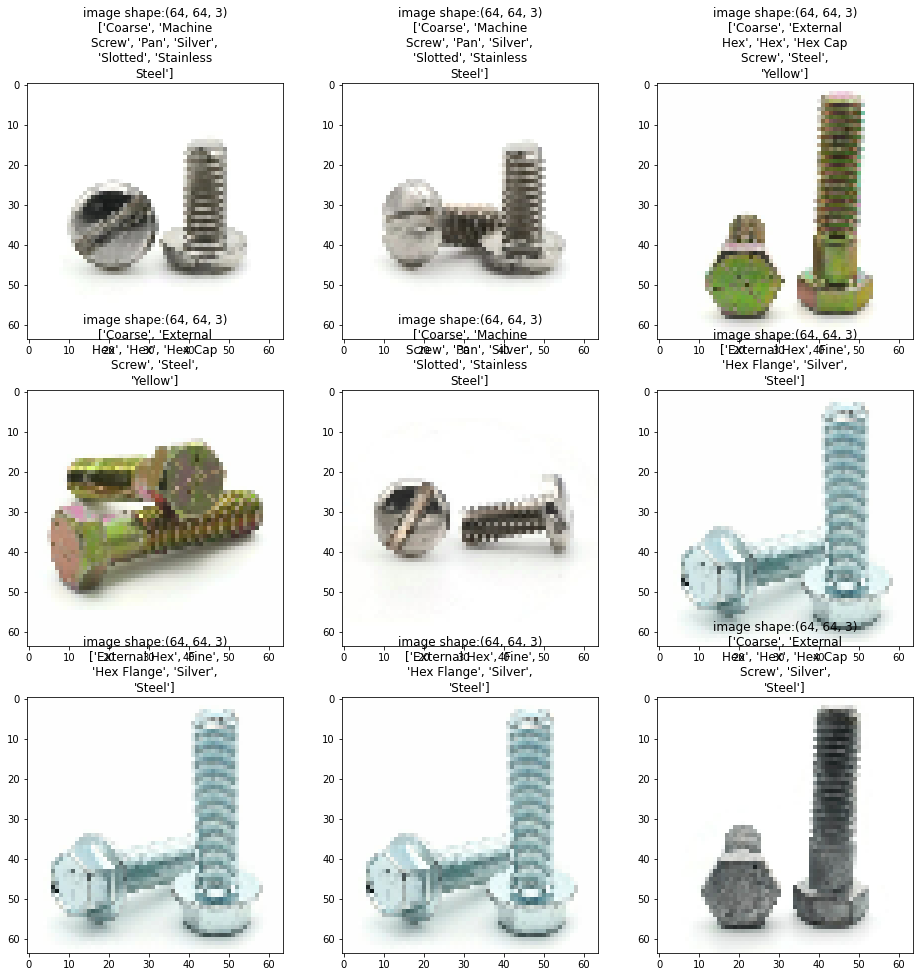

In [ ]:
from textwrap import wrap

def show_samples(dataset):
  plt.subplots_adjust(hspace=2.5)
  fig=plt.figure(figsize=(16, 16))
  columns = 3
  rows = 3
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(a))
    plt.title('\n'.join(wrap("image shape:"+ str(a.shape)+" "+ 
              str(covert_onehot_string_labels(LABELS,b.numpy())), 25)))
    i=i+1
  plt.show()
show_samples(ds_test)

In [ ]:
#buffer_size = ds_train_resize_scale.cardinality().numpy()/10
#ds_resize_scale_batched=ds_raw.repeat(3).shuffle(buffer_size=buffer_size).batch(64, )

ds_train_batched=ds_train.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 
ds_test_batched=ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

print("Number of batches in train: ", ds_train_batched.cardinality().numpy())
print("Number of batches in test: ", ds_test_batched.cardinality().numpy())

Number of batches in train:  48
Number of batches in test:  12


In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    include_top=False
)
base_model.trainable=False

In [ ]:
number_of_classes = len(LABELS)

In [ ]:
inputs = tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)

activation = tf.keras.activations.sigmoid
outputs = tf.keras.layers.Dense(number_of_classes, kernel_initializer=initializer, activation=activation)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 155)               79515     
Total params: 14,794,203
Trainable params: 79,515
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.fit(ds_train_batched, validation_data=ds_test_batched, epochs=100)

Epoch 1/100
48/48 [==============================] - 1574s 32s/step - loss: 0.2829 - binary_accuracy: 0.9191 - val_loss: 0.1310 - val_binary_accuracy: 0.9680
Epoch 2/100
48/48 [==============================] - 2s 49ms/step - loss: 0.1150 - binary_accuracy: 0.9714 - val_loss: 0.1017 - val_binary_accuracy: 0.9681
Epoch 3/100
48/48 [==============================] - 2s 48ms/step - loss: 0.0982 - binary_accuracy: 0.9717 - val_loss: 0.0928 - val_binary_accuracy: 0.9693
Epoch 4/100
48/48 [==============================] - 2s 45ms/step - loss: 0.0910 - binary_accuracy: 0.9724 - val_loss: 0.0880 - val_binary_accuracy: 0.9700
Epoch 5/100
48/48 [==============================] - 2s 48ms/step - loss: 0.0864 - binary_accuracy: 0.9730 - val_loss: 0.0847 - val_binary_accuracy: 0.9703
Epoch 6/100
48/48 [==============================] - 2s 48ms/step - loss: 0.0829 - binary_accuracy: 0.9735 - val_loss: 0.0822 - val_binary_accuracy: 0.9708
Epoch 7/100
48/48 [==============================] - 2s 46ms/s

In [ ]:
ds= ds_test_batched
print("Test Accuracy: ", model.evaluate(ds)[1])

12/12 [==============================] - 0s 36ms/step - loss: 0.0453 - binary_accuracy: 0.9850
Test Accuracy:  0.98499995470047


In [ ]:
ds=ds_test
predictions= model.predict(ds.batch(batch_size=50).take(1))
# print("A sample output from the last layer (model) ", predictions[0])
y=[]
print("10 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(50)):
  pred[pred>0.5]=1
  pred[pred<=0.5]=0
  print("predicted: " , str(covert_onehot_string_labels(LABELS, pred)),  
        "Actual Label: ", str(covert_onehot_string_labels(LABELS,b.numpy())))
  y.append(b.numpy())

10 Sample predictions:
predicted:  ['Coarse', 'External Hex', 'Hex', 'Hex Cap Screw', 'Steel', 'Yellow'] Actual Label:  ['External Hex', 'Fine', 'Hex Flange', 'Silver', 'Steel']
predicted:  ['Coarse', 'External Hex', 'Hex', 'Hex Cap Screw', 'Steel', 'Yellow'] Actual Label:  ['Coarse', 'Machine Screw', 'Pan', 'Silver', 'Slotted', 'Stainless Steel']
predicted:  ['Coarse', 'Machine Screw', 'Silver', 'Stainless Steel'] Actual Label:  ['External Hex', 'Fine', 'Hex Flange', 'Silver', 'Steel']
predicted:  ['Coarse', 'Machine Screw', 'Silver', 'Stainless Steel'] Actual Label:  ['External Hex', 'Fine', 'Hex Flange', 'Silver', 'Steel']
predicted:  ['Coarse', 'Machine Screw', 'Silver', 'Stainless Steel'] Actual Label:  ['Coarse', 'External Hex', 'Hex', 'Hex Cap Screw', 'Steel', 'Yellow']
predicted:  ['Coarse', 'External Hex', 'Hex Flange', 'Silver', 'Steel'] Actual Label:  ['Coarse', 'Machine Screw', 'Pan', 'Silver', 'Slotted', 'Stainless Steel']
predicted:  ['Coarse', 'External Hex', 'Hex Flange